In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
# Load Adult dataset
dataset = pd.read_csv("../dataset/adult.data.txt",
    names=["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"],sep=r'\s*,\s*',na_values="?", engine='python')
dataset.tail()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [3]:
#Find actual data count
datacount = dataset["Age"].value_counts()
print("datacount:\n", datacount)

datacount:
 36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


In [4]:
# Set parameters for Gaussian function implementation
# l2 sensitivity = 1
# epsilon = 0.125
# delta = 0.00001
location = 0.0
scale = np.sqrt(2.0*np.log(1.25/0.00001))*(1.0/0.125)

In [5]:
# Gets random Guassian noise for all values
Gaussian_noise = norm.rvs(location, scale, len(datacount))
print("Gaussian_noise:\n", Gaussian_noise)

Gaussian_noise:
 [ 31.69317188  33.94978685  34.83684281  19.74554516  54.22971621
 -38.6994712   23.70306944 -21.05026629  29.09015122   5.34234817
   1.45121406  -5.57058476 -13.75673114 -11.63931132 -75.43466842
   8.89134287  39.98730763  49.96606047  28.54065397  63.44931929
  20.54756226  -8.84298357  10.1688286   -2.86170818 -21.76668818
  29.42307875  -0.73345714 -23.1259486    7.14249135 -56.70989923
   2.47936959  11.26284762  59.03202518  50.3561672  -50.69121484
  27.12895628  20.13744285  81.60573205 -24.8419019   87.48143974
   8.37861951 -51.83854412 -11.27237043 -14.94699594  18.64461002
  12.93437451   0.84685489  59.78237072  35.02409687  53.66645731
  -2.947976    35.49096731  -2.09491868   9.86987875  50.10721209
  29.35921922  19.38086257  -9.72616457  -9.81652538  31.48889565
   9.18717753 -35.27915589  64.83989074  -3.61288981  -3.21953921
 -29.75782369  30.50414065  88.63133612  62.4403322   29.33348849
 -44.35169477  35.93099089 -30.01468398]


In [6]:
# Add random noise generated from Gaussian function to actual count
noisydata = datacount + Gaussian_noise
print("noisydata:\n", noisydata)

noisydata:
 36    929.693172
31    921.949787
34    920.836843
23    896.745545
35    930.229716
         ...    
83     68.440332
85     32.333488
88    -41.351695
86     36.930991
87    -29.014684
Name: Age, Length: 73, dtype: float64


In [7]:
# Get index of datacount, "age"
index=list(datacount.index)
# Transfer type of Laplace Noise from 'numpy.ndarray' to 'pandas.core.series.Series' and index
Gaussiannoise=pd.Series(Gaussian_noise,index=index)

<AxesSubplot:title={'center':'Gaussian noisydata histogram'}>

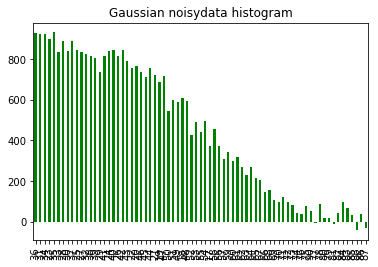

In [8]:
# Generate noisydata histogram
plt.figure("Figure 1: Gaussian noisydata histogram")
plt.title("Gaussian noisydata histogram")
noisydata.plot(kind="bar",color = 'g')

[]

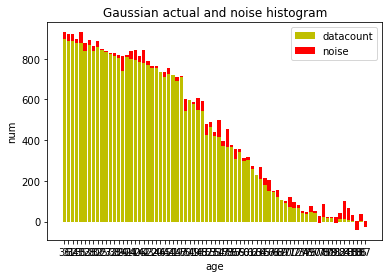

In [9]:
# Generate actual and noise histogram
plt.figure("Figure 2: Gaussian actual and noise histogram")
plt.ylabel("num")
plt.xlabel("age")
plt.bar(range(len(noisydata)),datacount,label='datacount',fc='y')
plt.bar(range(len(noisydata)),Gaussiannoise,bottom=datacount,label='noise',tick_label=index,fc='r')
plt.title("Gaussian actual and noise histogram")
plt.legend()
plt.plot()